# Applied Data Science and Machine Intelligence
## A program by IIT Madras and TalentSprint
### Mini Project: Linear Regression with Gradient Descent

## Learning Objectives

At the end of the mini project, you will be able to

* understand Optimization, apply optimization algorithms
* Understand the intuition behind ordinay least squares (OLS) linear regression. How is the best fit found? How do you actually implement gradient descent?
* Loading and looking at data and implementing
  - Cost function 
  - Gradient descent variants

**Packages used:**  
* `Pandas` for data frames and easy to read csv files  
* `Numpy` for array and matrix mathematics functions  
* `Matplotlib` and `Seaborn` for visualization
*  `sklearn` for the metrics and pre-processing


### Dataset Description

The dataset chosen for this mini project is [California Housing Price Data Set](https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html) with 20640 instances each having 9 attributes.

The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. The data aren't cleaned so there are some preprocessing steps required! The columns are as follows, their names are self explanatory:

* longitude

* latitude

* housing_median_age

* total_rooms

* total_bedrooms

* population

* households

* median_income

* median_house_value

* ocean_proximity

## Grading = 10 Points

### Download the data

In [ ]:
#@title Load the dataset
!wget -qq https://cdn.extras.talentsprint.com/ADSMI/Datasets/California_housing.csv

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
import random
from sklearn.preprocessing import MinMaxScaler

**Exercise 1**: Load the data and perform the following (2 points)
- Exploratory Data Analysis 
- Preprocessing 


**Hints:** 

- checking for the number of rows and columns
- summary of the dataset
- statistical description of the features 
- check for the duplicate values
- Show the top 5 and the last 5 rows of the data
- check for the null values, and handle them if *any*

In [ ]:
# YOUR CODE HERE
data = pd.read_csv('California_housing.csv')
data.drop_duplicates(inplace = True)
print("Number of rows/features: %d" %(data.shape[1]))
print("Number of columns/examples: %d" %(data.shape[0]))
#data.columns
data.describe()
data.head()
#data.tail()
#data.isnull().values.any()

Number of rows/features: 9
Number of columns/examples: 20640


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Housing_Value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


**Exercise 2**: Data Visualization (1 point)

- Visualize the Latitude and Longitude using the Population as size
- Plot the distribution of all the variables as histograms
- Correlations between variables as heatmap
- Analyze the results between target and other features (Hint: *Pair plot*)

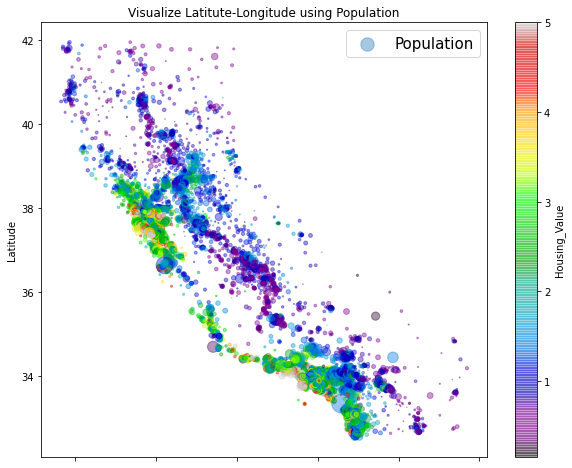

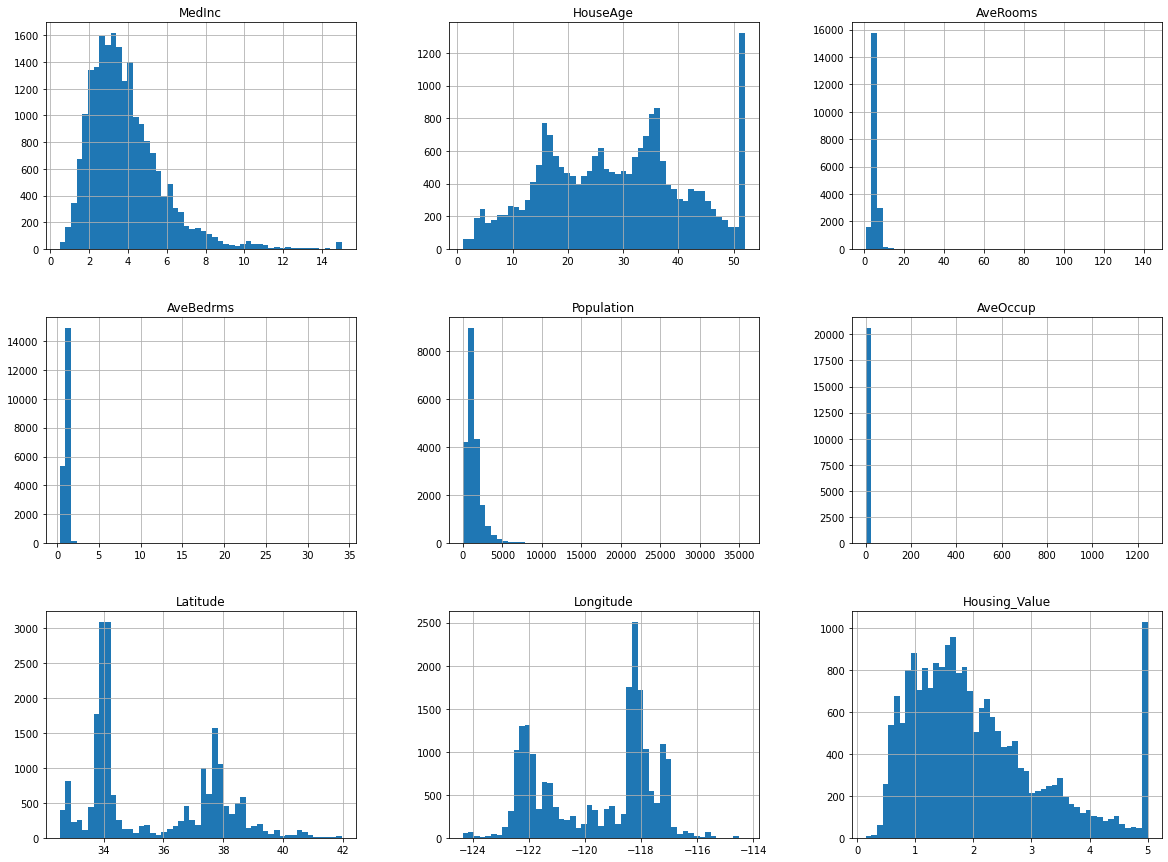

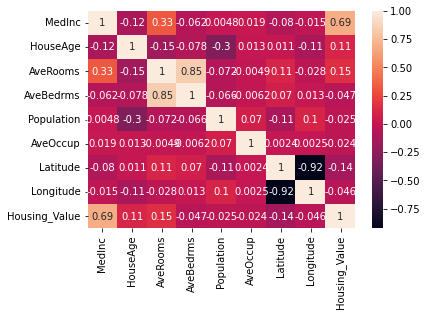

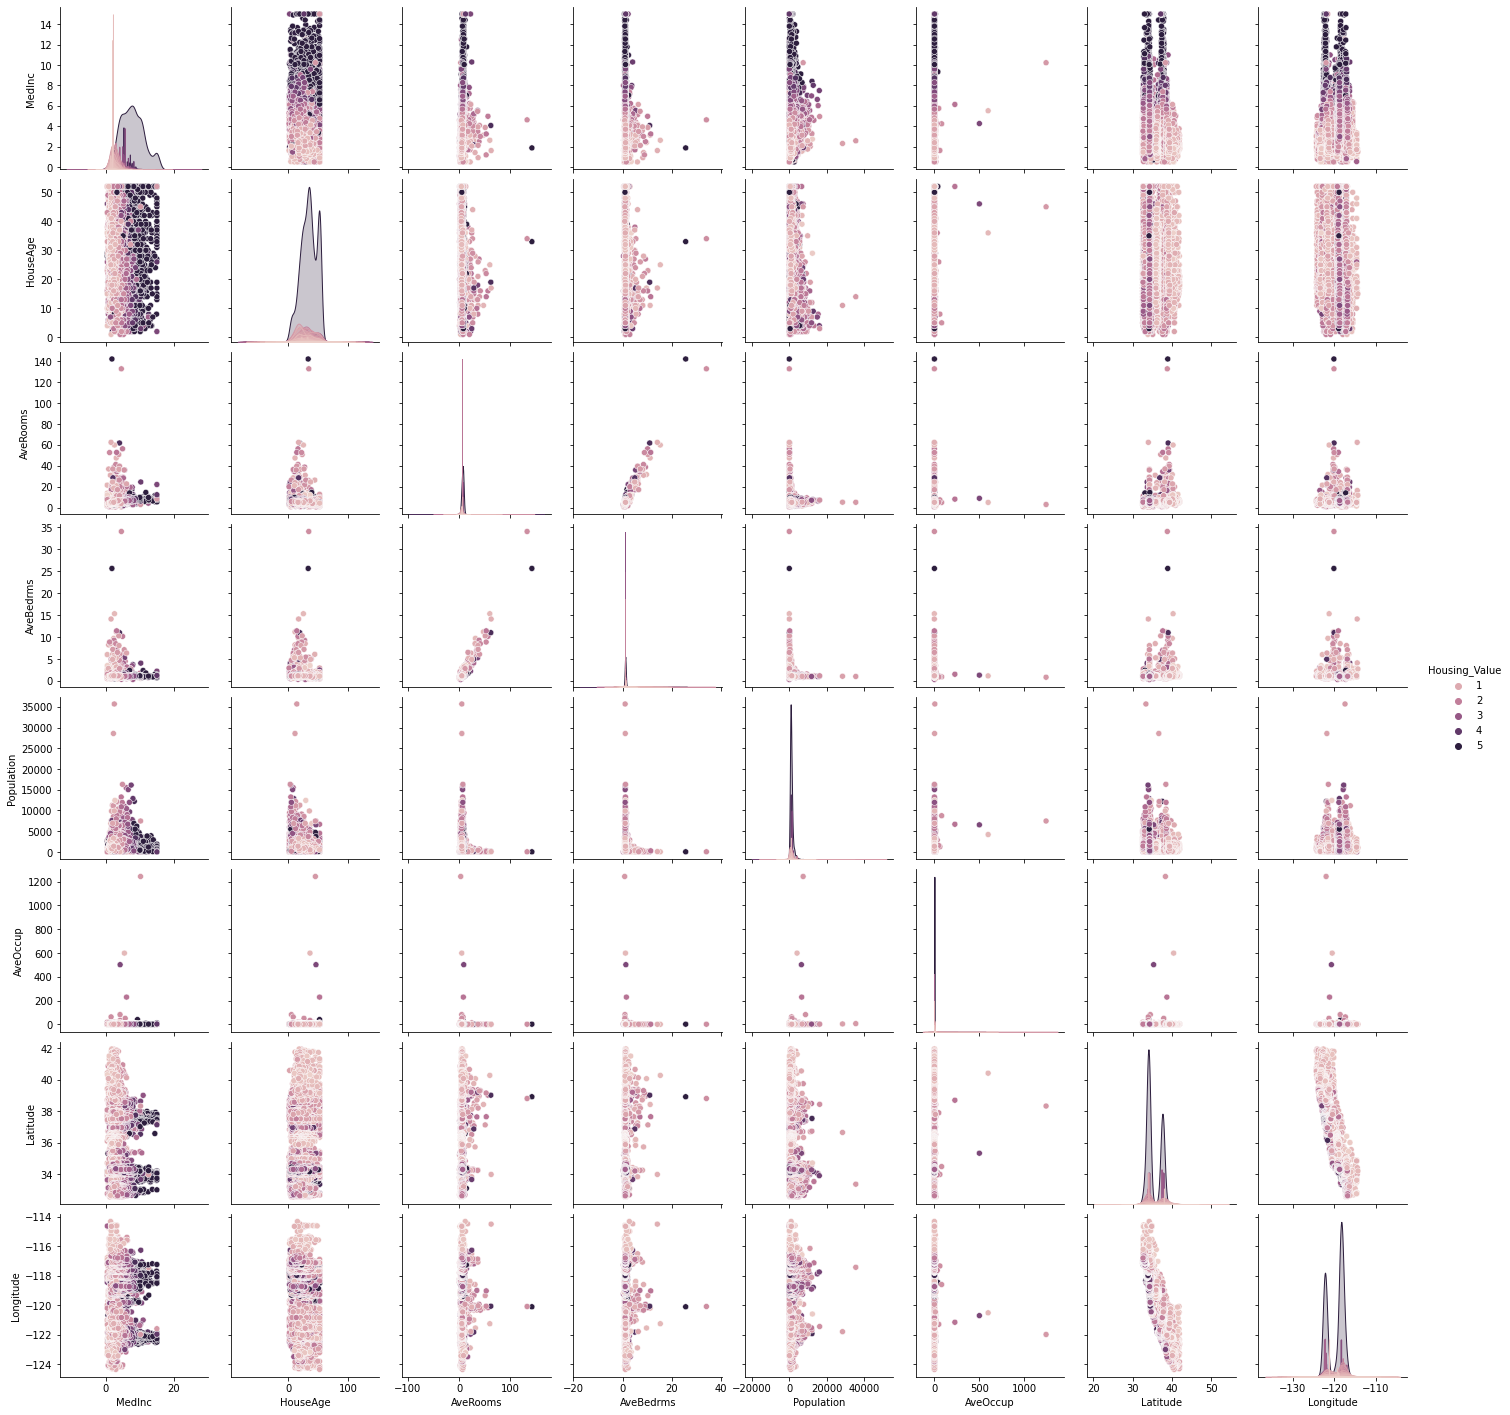

In [ ]:
# YOUR CODE HERE
#plt.scatter(data["Population"], data["Latitude"])
#plt.show()
data.plot(kind="scatter", x="Longitude", y="Latitude",s=data['Population']/100, label="Population", c="Housing_Value", cmap=plt.get_cmap("nipy_spectral"), colorbar=True, alpha=0.4, figsize=(10,8))
plt.title("Visualize Latitute-Longitude using Population")
plt.legend(fontsize=15)
plt.show()
data.hist(bins=50, figsize=(20,15))
plt.show()
sns.heatmap(data.corr(),annot=True)
plt.show()
sns.pairplot(data, hue ='Housing_Value')

**Exercise 3:** Data Preparation (1 Point)

 - Create new features:

    - Create possible new features based on the existing data
  
      For eg. `bedrooms per room` = AveBedrms / AveRooms

- Identify the `features`, `target` from the given set of attributes and split the data into train, test

- Normalization

  **Hint:**: `StandardScaler` or `MinMaxScaler`



In [ ]:
#  YOUR CODE HERE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data_transformed=sc.fit_transform(data)
print(data_transformed)
n = np.shape(data_transformed)[1]
x = data_transformed[:, 0:n-1]
y = data_transformed[:, n-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
np.shape(x_train)

[[ 2.34476576  0.98214266  0.62855945 ...  1.05254828 -1.32783522
   2.12963148]
 [ 2.33223796 -0.60701891  0.32704136 ...  1.04318455 -1.32284391
   1.31415614]
 [ 1.7826994   1.85618152  1.15562047 ...  1.03850269 -1.33282653
   1.25869341]
 ...
 [-1.14259331 -0.92485123 -0.09031802 ...  1.77823747 -0.8237132
  -0.99274649]
 [-1.05458292 -0.84539315 -0.04021111 ...  1.77823747 -0.87362627
  -1.05860847]
 [-0.78012947 -1.00430931 -0.07044252 ...  1.75014627 -0.83369581
  -1.01787803]]


(16512, 8)

### Find the best fit line using

- Gradient descent
- Mini batch gradient
- Stochastic gradient descent

### Gradient Descent for Multiple Linear Regression


The idea behind gradient descent is by gradually tuning parameters, such as slope (m) and the intercept (b) in our regression function $y = mx + b$, Minimize cost of a function that tells how far off model predicted result. For regression problems use mean squared error (MSE) cost function.

$$ MSE = \frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y_i})^2 \quad \textrm{where} \quad \hat{y_i} = mx_i + b $$
Now, Figure out how to tweak parameters m and b to reduce MSE.

**Partial Derivatives**

Use partial derivatives to find how each individual parameter affects MSE. Take the derivative with respect to m and b separately. Take a look at the formula below. It looks almost exactly the same as MSE, but this time add f(m, b) to it. then plug m and b numbers into it and calculate the result.

$$𝑓(𝑚,𝑏)= \frac{1}{n}\sum_{i=1}^{n}(y_i - (mx_i+b))^2$$
This function is better representation for further calculations of partial derivatives.

**Partial Derivative With Respect to m**

With respect to m means we derive parameter m and ignore what is going on with b, or it is 0. To derive with respect to m we will use chain rule.

$$ [f(g(x))]' = f'(g(x)) * g(x)' \: - \textrm{chain rule}$$
Chain rule applies when one function sits inside of another. Lets write these steps down:

$$ (y - (mx + b))^2 $$
1. Derivative of $(f)^2$ is $2(f)$, same as $x^2$ becomes $2x$
2. We do nothing with $y - (mx + b)$, so it stays the same
3. Derivative of $y - (mx + b)$ with respect to m is $(0 - (x + 0))$ or $-x$, because y and b are constants, they become 0, and derivative of mx is x

Multiply all parts we get following: $2 * (y - (mx+b)) * -x$. if we move -x to the left: $-2x *(y-(mx+b))$. The final version of our derivative is the following:

$$\frac{\partial f}{\partial m} = \frac{1}{n}\sum_{i=1}^{n}-2x_i(y_i - (mx_i+b))$$
Here, $\frac{df}{dm}$ means we find partial derivative of function f (we mentioned it earlier) with respect to m.

**Partial Derivative With Respect to b**

Same rules apply to the derivative with respect to b.

  $y - (mx + b)$ becomes $(0 - (0 + 1))$ or $-1$, because y and mx are constants, they become 0, and derivative of b is 1

Multiply all the parts together and we get $-2(y-(mx+b))$

$$\frac{\partial f}{\partial b} = \frac{1}{n}\sum_{i=1}^{n}-2(y_i - (mx_i+b))$$

**Final Function**

1. Gradient descent is an iterative process and with each iteration (epoch) we slightly minimizing MSE, so each time we use our derived functions to update parameters m and b
2. Because its iterative, we should choose how many iterations we take, or make algorithm stop when we approach minima of MSE. In other words when algorithm is no longer improving MSE, we know it reached minimum.
3. Gradient descent has an additional parameter learning rate (lr), which helps control how fast or slow algorithm going towards minima of MSE
Thats about it. So you can already understand that Gradient Descent for the most part is just process of taking derivatives and using them over and over to minimize function.

**Exercise 4:** Find the best fit line using Gradient descent and visualize the results (2 points)

**Hints:**
       
- write a function to return predicted(y), when inputs are : x, weight and intercept 
- write a function to return linear loss, when inputs are : y_true and y_predicted
- write a function to return derivative of loss w.r.t weight, when inputs are : x, y_true, and y_predicted
- write a function to return derivative of loss w.r.t bias, when inputs are : y_true, and y_predicted
- write a function to perform gradient descent, when inputs are : x and y
- write a function to return derivative of loss w.r.t bias, when inputs are : y_true, and y_predicted
- use all the above functions to predict, display the results and the accuracy

Read this [article](https://medium.com/analytics-vidhya/implementing-gradient-descent-for-multi-linear-regression-from-scratch-3e31c114ae12) for more information

[ 0.69681472  0.15555154 -0.03561797  0.04992369  0.19248588 -0.04623127
  0.11385892  0.13776236] 0.0007140279034479466
[10.84509743 10.77612276 10.70763092 10.63961842 10.57208177 10.50501753
 10.43842227 10.37229259 10.30662513 10.24141652 10.17666345 10.11236261
 10.04851074  9.98510458  9.92214091  9.85961652  9.79752824  9.73587291
  9.67464739  9.61384859  9.55347342  9.49351881  9.43398172  9.37485914
  9.31614808  9.25784556  9.19994863  9.14245437  9.08535986  9.02866222
  8.97235859  8.91644613  8.86092202  8.80578345  8.75102764  8.69665184
  8.64265331  8.58902932  8.53577719  8.48289423  8.43037779  8.37822522
  8.32643391  8.27500126  8.22392468  8.17320162  8.12282953  8.07280589
  8.0231282   7.97379396  7.92480072  7.87614601  7.82782741  7.77984251
  7.73218891  7.68486422  7.6378661   7.59119219  7.54484017  7.49880774
  7.4530926   7.40769247  7.3626051   7.31782824  7.27335968  7.2291972
  7.18533861  7.14178173  7.09852441  7.0555645   7.01289988  6.97052842
  6.

<function matplotlib.pyplot.show>

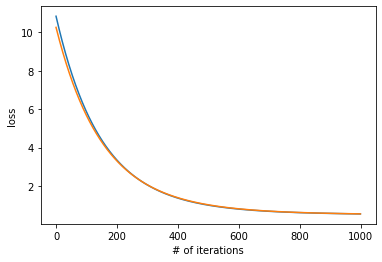

In [ ]:
#  YOUR CODE HERE
# calculating the loss 
def loss(y,y_predicted):
    n=len(y)
    s=0
    for i in range(n):
        s+=(y[i]-y_predicted[i])**2
    return (1/n)*s

# calculating the prediction for the target

def predicted_y(weight,x,intercept):
    y_lst=[]
    for i in range(len(x)):
        y_lst.append(weight@x[i]+intercept) 
    return np.array(y_lst)

# derivative w.r.t. weights

def dldw(x,y,y_predicted):
    s=0
    n=len(y)
    for i in range(n):
        s+=-x[i]*(y[i]-y_predicted[i])
    return (2/n)*s

# derivative w.r.t bias

def dldb(y,y_predicted):
    n=len(y)
    s=0
    for i in range(len(y)):
        s+=-(y[i]-y_predicted[i])
    return (2/n) * s



weight_vector = np.random.randn(x.shape[1])
intercept = 0
learning_rate = 0.001 
epoch = 1000 
error_train = np.zeros(epoch)
error_test = np.zeros(epoch)
for i in range(epoch):
     
     y_train_predicted = predicted_y(weight_vector,x_train,intercept)
     y_test_predicted  = predicted_y(weight_vector,x_test,intercept)
     error_train[i] = loss(y_train, y_train_predicted)
     error_test[i] = loss(y_test, y_test_predicted)
     weight_vector = weight_vector - learning_rate *dldw(x_train,y_train,y_train_predicted)  #update weight
     intercept = intercept - learning_rate * dldb(y_train,y_train_predicted) 

print(weight_vector, intercept ) 
print(error_train)  
plt.plot(error_train,  label = 'train')
plt.plot(error_test, label = 'test')
plt.xlabel("# of iterations")
plt.ylabel("loss")
plt.show   

**Exercise 5:** Find the best fit line using SGD for Multiple Linear Regression and visualize the results (2 points)

**Hints:**
       
- write a function to return predicted(y), when inputs are : x, weight and intercept 
- write a function to return linear loss, when inputs are : y_true and y_predicted
- write a function to return derivative of loss w.r.t weight, when inputs are : x, y_true, and y_predicted
- write a function to return derivative of loss w.r.t bias, when inputs are : y_true, and y_predicted
- write a function to perform Stochastic gradient descent, when inputs are : x and y
- write a function to return derivative of loss w.r.t bias, when inputs are : y_true, and y_predicted
- use all the above functions to predict, display the results and the accuracy



In [ ]:
# YOUR CODE(s) HERE
import random
from random import randint
# calculating the loss 
def loss(y,y_predicted):
  return (y-y_predicted)**2 

# calculating the prediction for the target

def predicted_y(weight,x,intercept):
    y_lst=[]
    for i in range(len(x)):
        y_lst.append(weight@x[i]+intercept) 
    return np.array(y_lst)

# derivative w.r.t. weights

def dldw(x,y,y_predicted):
  return -2*x*(y-y_predicted)

# derivative w.r.t bias

def dldb(y,y_predicted):
  return -2*(y-y_predicted)



weight_vector = np.random.randn(x.shape[1])
intercept = 0
learning_rate = 0.001 
epoch = 10 
error_train = np.zeros(epoch)
error_test = np.zeros(epoch)
for i in range(epoch):
     temp = randint(0, n)
     y_train_predicted = predicted_y(weight_vector,x_train[temp, :],intercept)
     y_test_predicted  = predicted_y(weight_vector,x_test,intercept)
     error_train[i] = loss(y_train, y_train_predicted)
     error_test[i] = loss(y_test, y_test_predicted)
     weight_vector = weight_vector - learning_rate *dldw(x_train[temp, :],y_train[temp, :],y_train_predicted)  #update weight
     intercept = intercept - learning_rate * dldb(y_train[temp, :],y_train_predicted) 

print(weight_vector, intercept ) 
print(error_train)  
plt.plot(error_train, label = 'train')
plt.plot(error_test, label = 'test')
plt.xlabel("# of iterations")
plt.ylabel("loss")
plt.show   

ValueError: ignored

**Exercise 6:** Find the best fit line using Mini Batch Gradient Descent for Multiple Linear Regression and visualize the results (2 points)

**Hints:**
       
- write a function to return predicted(y), when inputs are : x, weight and intercept 
- write a function to return linear loss, when inputs are : y_true and y_predicted
- write a function to return derivative of loss w.r.t weight, when inputs are : x, y_true, and y_predicted
- write a function to return derivative of loss w.r.t bias, when inputs are : y_true, and y_predicted
- write a function to perform mini-batch gradient descent, when inputs are : x and y
- write a function to return derivative of loss w.r.t bias, when inputs are : y_true, and y_predicted
- use all the above functions to predict, display the results and the accuracy



In [ ]:
#  YOUR CODE(s) HERE

### Report Analysis

* Report in what is the step size (ETA) for gradient descent
* Discuss about finding the local minima
* Discuss the Linear structure of the data and features used in fitting the best fit line.